# Predição da Idade

## importar bibliotecas

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## ler train.csv e test.csv

In [89]:
train = pd.read_csv('titanic/train.csv')

In [90]:
test = pd.read_csv('titanic/test.csv')

## transformar definir o Id do Passageiro como Index

In [91]:
train.set_index('PassengerId', inplace=True)

In [92]:
test.set_index('PassengerId',inplace=True)

## Verificar shape dos dois

In [93]:
test.shape, train.shape

((418, 10), (891, 11))

## Criar coluna "Survived" no test set

In [94]:
test['Survived'] = np.nan

## Conferir shape novamente

In [95]:
test.shape, train.shape

((418, 11), (891, 11))

## Concatenar train e test set

In [96]:
data = pd.concat([train, test], sort=False)

In [97]:
data.shape

(1309, 11)

## Traduzir colunas

In [98]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [99]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade',
                'IrmaosConjuge', 'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

## Traduzir Sexo

In [100]:
data['Sexo'] = data['Sexo'].map({'male': 'homem', 'female': 'mulher'})

## Averiguar dados nulos

In [101]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

## Remover Cabine

In [102]:
data.drop('Cabine', axis=1, inplace=True)

## Checar dados nulos novamente

In [103]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

## Preencher dados nulos de "Embarque" com a moda

In [104]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [105]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [106]:
data['Embarque'].fillna(moda, inplace=True)

## Checar dados nulos novamente

In [107]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

## Preencher "Tarifa" faltando com a média

In [108]:
media = data['Tarifa'].mean()
media

33.29547928134557

In [109]:
data['Tarifa'].fillna(media, inplace=True)

## Checar dados nulos

In [110]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

## Verificar correlações

In [111]:
data.corr()

,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


## Visualizar correlações com "heatmap"

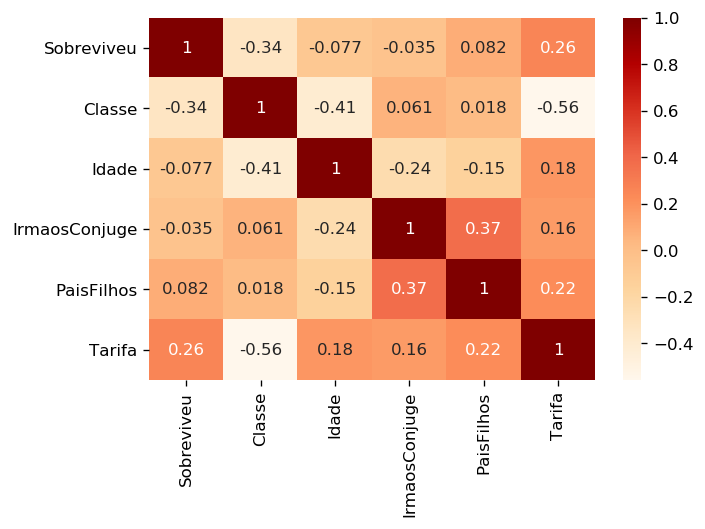

In [112]:
f, ax = plt.subplots(dpi=120)
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

plt.show()

## Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [113]:
data.drop('Sobreviveu', axis=1, inplace=True)

## Checar dados nulos

In [114]:
data.isnull().sum()

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

# Engenharia de Recursos I

## Criar coluna "Titulo" baseando-se na coluna "Nome"

In [115]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [116]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [117]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [118]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss', 'Master', 'Mr', 'Mrs'] else x)

In [119]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


## Traduzir "Titulos"

In [120]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada' 
}

In [121]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

## Averiguar informações do DataFrame

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Nome           1309 non-null   object 
 2   Sexo           1309 non-null   object 
 3   Idade          1046 non-null   float64
 4   IrmaosConjuge  1309 non-null   int64  
 5   PaisFilhos     1309 non-null   int64  
 6   Bilhete        1309 non-null   object 
 7   Tarifa         1309 non-null   float64
 8   Embarque       1309 non-null   object 
 9   Titulo         1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


## Remover "Bilhete" e "Nome"

In [123]:
data.drop(['Bilhete', 'Nome'], axis=1, inplace=True)

In [124]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto
2,1,mulher,38.0,1,0,71.2833,C,Casada
3,3,mulher,26.0,0,0,7.9250,S,Solteira
4,1,mulher,35.0,1,0,53.1000,S,Casada
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto


# Engenharia de Recursos II

## Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

In [125]:
solteiras_com_pais = data.loc[(data['Titulo'] == 'Solteira') & (data['PaisFilhos'] >= 1)]
solteiras_com_pais.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
11,3,mulher,4.0,1,1,16.7000,S,Solteira
25,3,mulher,8.0,3,1,21.0750,S,Solteira
44,2,mulher,3.0,1,2,41.5792,C,Solteira
59,2,mulher,5.0,1,2,27.7500,S,Solteira
69,3,mulher,17.0,4,2,7.9250,S,Solteira


## idade média de "meninas solteiras acompanhadas dos pais"

In [126]:
solteiras_com_pais.mean()

Classe            2.302326
Idade            12.178816
IrmaosConjuge     1.686047
PaisFilhos        1.523256
Tarifa           51.192345
dtype: float64

## verificar distribuição da idade

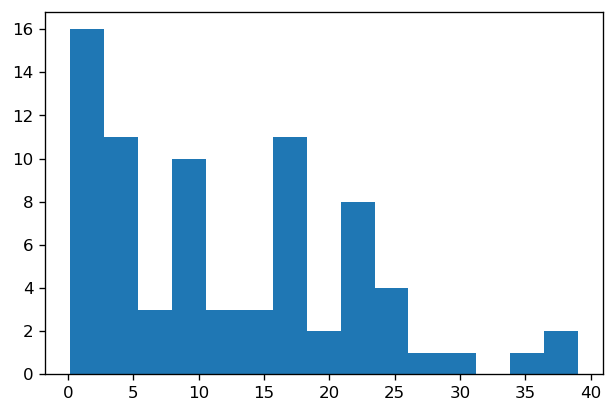

In [127]:
f, ax = plt.subplots(dpi=120)
plt.hist(solteiras_com_pais['Idade'], bins=15)
plt.show()

## Média de mulheres "solteiras"

In [128]:
data.loc[data['Titulo'] == 'Solteira']['Idade'].mean()

21.774238095238097

## Distribuição das idades de mulheres "solteiras"

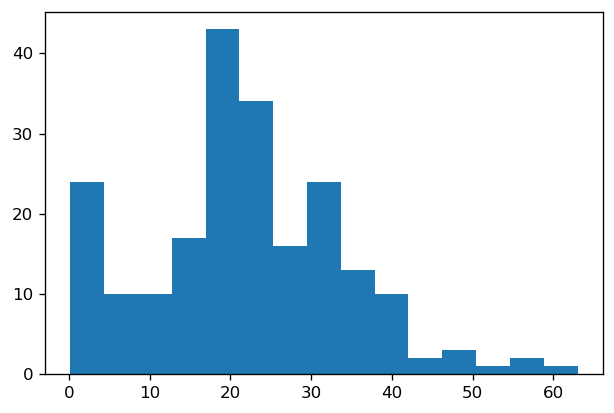

In [129]:
f, ax = plt.subplots(dpi=120)
plt.hist(data.loc[data['Titulo'] == 'Solteira']['Idade'], bins=15)
plt.show()

## Média de idade de mulheres "casadas"

In [130]:
data.loc[data['Titulo'] == 'Casada']['Idade'].mean()

36.99411764705882

## Distribuição das idades de mulheres "casadas"

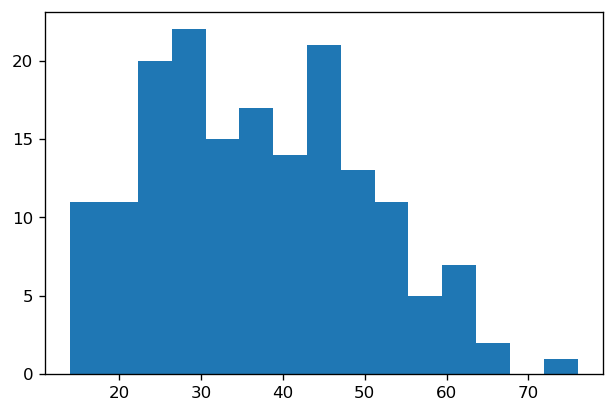

In [131]:
f, ax = plt.subplots(dpi=120)
plt.hist(data.loc[data['Titulo'] == 'Casada']['Idade'], bins=15)
plt.show()

## Adicionar coluna "solteira com pais"

In [132]:
solteiras_com_pais.index

Int64Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,
             173,  181,  185,  206,  230,  234,  238,  298,  312,  319,  330,
             342,  357,  375,  382,  410,  418,  420,  436,  437,  447,  449,
             470,  480,  486,  531,  536,  540,  541,  542,  543,  581,  586,
             594,  616,  619,  635,  643,  645,  652,  690,  692,  703,  721,
             743,  751,  793,  814,  836,  853,  854,  864,  889,  918,  944,
             945, 1009, 1017, 1032, 1067, 1078, 1080, 1095, 1106, 1130, 1142,
            1155, 1175, 1176, 1188, 1218, 1246, 1277, 1294, 1301],
           dtype='int64', name='PassengerId')

In [133]:
data['solteiras_com_pais'] = 0

In [134]:
for idx, _ in data.iterrows():
    if idx in solteiras_com_pais.index:
        data['solteiras_com_pais'][idx] = 1

In [135]:
data.loc[data['solteiras_com_pais'] == 1]['Idade'].mean()

12.178815789473685

In [136]:
data.loc[data['solteiras_com_pais'] == 0]['Idade'].mean()

31.26812371134021

## Transformar recursos categóricos em "dummies"

In [137]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteiras_com_pais
PassengerId,,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,mulher,38.0,1,0,71.2833,C,Casada,0
3,3,mulher,26.0,0,0,7.9250,S,Solteira,0
4,1,mulher,35.0,1,0,53.1000,S,Casada,0
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto,0


In [138]:
data['Sexo'] = data['Sexo'].map({'homem': 0, 'mulher': 1})

In [139]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteiras_com_pais
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,1,38.0,1,0,71.2833,C,Casada,0
3,3,1,26.0,0,0,7.9250,S,Solteira,0
4,1,1,35.0,1,0,53.1000,S,Casada,0
5,3,0,35.0,0,0,8.0500,S,HomemAdulto,0


In [140]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque', 'Titulo'], drop_first=True)

In [141]:
data.shape

(1309, 13)

## Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

In [142]:
data.isnull().sum()

Sexo                    0
Idade                 263
IrmaosConjuge           0
PaisFilhos              0
Tarifa                  0
solteiras_com_pais      0
Classe_2                0
Classe_3                0
Embarque_Q              0
Embarque_S              0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Solteira         0
dtype: int64

In [143]:
train_idade = data.dropna()

In [144]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade', axis=1)

In [145]:
train_idade.shape, test_idade.shape

((1046, 13), (263, 12))

## Definir X e y para treinar o modelo

In [146]:
X = train_idade.drop('Idade', axis=1)

In [147]:
y = train_idade['Idade']

In [148]:
X.shape, y.shape

((1046, 12), (1046,))

## Importar modelo regressivo

In [149]:
from sklearn import linear_model

## Instanciar modelo

In [150]:
lm = linear_model.LinearRegression()

## Importar train_test_split para preparar para treino

In [151]:
from sklearn.model_selection import train_test_split

## Dividir 70% para treinar, 30% para testar

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

## Treinar modelo

In [153]:
X_train.shape, y_train.shape

((732, 12), (732,))

In [154]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
X_test.shape, y_test.shape

((314, 12), (314,))

## Fazer predição

In [156]:
pred = lm.predict(X_test)
pred.shape

(314,)

## Importar mean_squared_error (erro quadrado médio)

In [157]:
from sklearn.metrics import mean_squared_error

## Averiguar score

In [158]:
lm.score(X_test, y_test)

0.480587698243224

## Averiguar rmse

In [159]:
mse = mean_squared_error(y_test, pred)

In [160]:
rmse = np.sqrt(mse)
rmse

10.363417349081384

## Visualizar resíduos em scatterplot

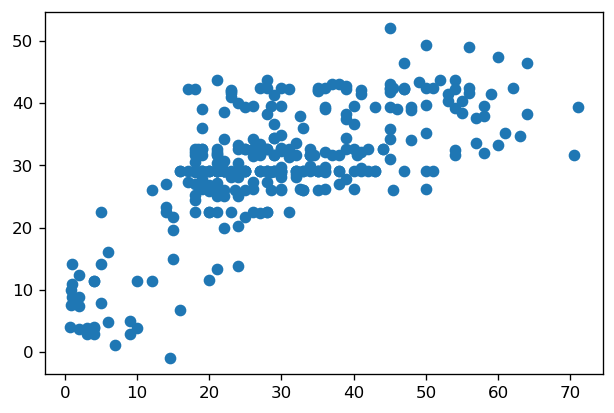

In [161]:
f, ax = plt.subplots(dpi=120)
plt.scatter(y_test, pred)

plt.show()

<a name="tarifa"></a>

## Aplicar modelo nos dados nulos

In [162]:
test_idade.shape

(263, 12)

In [163]:
pred_idade = lm.predict(test_idade)

In [164]:
pred_idade.shape

(263,)

## Criar coluna Idade contendos as predições

In [165]:
test_idade['Idade'] = pred_idade

In [166]:
test_idade.isnull().sum()

Sexo                  0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteiras_com_pais    0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
Idade                 0
dtype: int64

## Averiguar shapes

In [167]:
test_idade.shape, train_idade.shape

((263, 13), (1046, 13))

## Concatenar dados

In [168]:
idade = pd.concat([train_idade, test_idade], sort=False)

## Criar DataFrame contendo "IdPassageiro" e "Idade"

In [169]:
idade.isnull().sum()

Sexo                  0
Idade                 0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteiras_com_pais    0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
dtype: int64

In [170]:
idade.shape

(1309, 13)

In [171]:
idade_completa = pd.DataFrame({'IdPassageiro': idade.index, 'Idade': idade['Idade']})

## Salvar CSV com idade completa

In [172]:
idade_completa.to_csv('titanic/idade_completa.csv', index=False)

In [173]:
data_idade = pd.read_csv('titanic/idade_completa.csv')

In [174]:
data_idade

,IdPassageiro,Idade
0,1,22.000000
1,2,38.000000
2,3,26.000000
3,4,35.000000
4,5,35.000000
...,...,...
1304,1300,25.163780
1305,1302,25.163531
1306,1305,29.088798
1307,1308,29.088798
